In [2]:
import numpy as np
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class MLP(Model):
    def __init__(self, hidden_dim, output_dim):
        super().__init__()
        self.i1 = Dense(hidden_dim, activation='sigmoid')
        self.i2 = Dense(output_dim, activation='sigmoid')
    
    def call(self, x):
        h = self.i1(x)
        y = self.i2(h)
        return y

In [4]:
np.random.seed(0)
tf.random.set_seed(0)

In [5]:
N = 300
x, t = datasets.make_moons(N, noise = 0.3)
t = t.reshape(N, 1)
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2)

In [6]:
model = MLP(3,1)

In [7]:
criterion = losses.BinaryCrossentropy()
optimizer = optimizers.SGD(learning_rate = 0.1)

def compute_loss(t, y):
    return criterion(t, y)

def train_step(x,t):
    with tf.GradientTape() as tape:
        preds = model(x)
        loss = compute_loss(t, preds)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss

epochs = 100
batch_size = 10
n_batches = x_train.shape[0] // batch_size

for epoch in range(epochs):
    train_loss = 0.
    x_, t_ = shuffle(x_train, t_train)
    
    for batch in range(n_batches):
        start = batch*batch_size
        end = start + batch_size
        loss = train_step(x_[start:end], t_[start:end])
        train_loss += loss.numpy()
    
    print('epoch:{}, loss:{:.3}'.format(epoch+1, train_loss))




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

epoch:1, loss:16.8
epoch:2, loss:16.3
epoch:3, loss:16.0
epoch:4, loss:15.6
epoch:5, loss:15.3
epoch:6, loss:14.9
epoch:7, loss:14.5
epoch:8, loss:14.2
epoch:9, loss:13.8
epoch:10, loss:13.4
epoch:11, loss:13.1
epoch:12, loss:12.8
epoch:13, loss:12.4
epoch:14, loss:12.1
epoch:15, loss:11.9
epoch:16, loss:11.6
epoch:17, loss:11.4
epoch:18, loss:11.2
epoch:19, loss:11.0
epoch:20, loss:10.8
epoch:21, loss:10.7
epoch:22, loss:10.5
epoch:23, loss:10.4
epoch:24, loss:10.3
epoch:25, loss:10.2
epoch:26, loss:10

In [8]:
test_loss = metrics.Mean()
test_acc = metrics.BinaryAccuracy()
def test_step(x, t):
    preds = model(x)
    loss = compute_loss(t, preds)
    test_loss(loss)
    test_acc(t, preds)
    return preds

test_step(x_test, t_test)

print('test_loss:{:.3f}, test_acc:{:.3f}'.format(test_loss.result(), test_acc.result()))

test_loss:0.253, test_acc:0.883


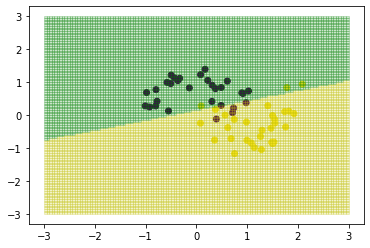

In [9]:
for i in range(120):
    for j in range(120):
        x_ = np.array([[(i-60)*0.05, (j-60)*0.05]])
        m = model(x_)
        if m[0, 0] > 0.5:
            plt.fill([x_[0, 0], x_[0, 0], x_[0, 0]+0.05, x_[0, 0]+0.05], [x_[0, 1], x_[0, 1]+0.05, x_[0, 1]+0.05, x_[0, 1]],color="y",alpha=0.2)
        else:
             plt.fill([x_[0, 0], x_[0, 0], x_[0, 0]+0.05, x_[0, 0]+0.05], [x_[0, 1], x_[0, 1]+0.05, x_[0, 1]+0.05, x_[0, 1]],color="g",alpha=0.2)

plt.scatter(x_test[:, 0], x_test[:, 1], c=t_test.T[0])
plt.show()